# Linear Regression Model

## Step 1: Import packages and set working directory

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Optional Code: Here's a format for setting working directory, change as needed
import os
# os.chdir('/path/to/the/project')
os.chdir('/Users/zihanji/Desktop/DS340W')

## Step 2: Load the final cleaned data

In [3]:
data_final = pd.read_csv('./project/volume/data/processed/data_final.csv')

## Step 3: Take a look at the final data

In [4]:
data_final

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,4.727388,6.461468,6.091310,6.985642,7.412764,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.360741,5,1.945910,0.000000,6.150603,5.602119,6.783325,6.799056,...,False,False,False,True,False,False,False,False,True,False
2,3.044522,4.406719,9.565775,6,1.945910,4.691348,6.828712,6.008813,7.192934,7.192934,...,False,False,False,True,False,False,False,False,True,False
3,3.044522,4.543295,9.320181,7,1.791759,0.000000,6.971669,6.952729,7.654917,7.654917,...,False,False,False,True,False,False,False,False,True,False
4,4.110874,4.317488,9.534668,5,1.791759,0.000000,6.674561,4.927254,6.834109,6.834109,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,4.394449,3.637586,8.979417,6,1.945910,0.000000,6.709304,5.220356,6.911747,6.911747,...,False,False,False,True,False,False,False,False,True,False
2926,3.044522,4.251699,9.092232,5,1.791759,0.000000,5.710427,5.480639,6.762730,6.805723,...,False,False,False,True,False,False,False,False,True,False
2927,4.454347,4.143135,9.253591,5,1.791759,0.000000,5.823046,6.356108,6.816736,6.878326,...,False,False,False,True,False,False,False,False,True,False
2928,3.044522,4.356709,9.211440,5,1.791759,0.000000,6.977281,5.278115,7.237059,7.237059,...,False,False,False,True,False,False,False,False,True,False


## Step 4: Building the linear regression model

In [5]:
# Split the data to features and result
x = data_final.drop('SalePrice', axis = 1)
y = data_final['SalePrice']

In [6]:
# Split the data to train and test, with test size being 20% of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [7]:
# Fit the model to built a prediction for x test
linear = LinearRegression()
linear.fit(x_train, y_train)
linear_pred = linear.predict(x_test)

## Step 5: Check for scores

In [8]:
# Check for the score of the prediction
linear_score = linear.score(x_train, y_train)
print('Linear Regression Model Score: ', round(linear_score, 3))

# R squared value
r2 = r2_score(y_test, linear_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, linear_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, linear_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(linear, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Linear Regression Model Score:  0.934
R Squared:  0.907
Adjusted R Squared:  0.897
Mean Squared Error:  0.017
Root Mean Squared Error:  0.131
Mean Absolute Error:  0.076
Accuracy:  87.308 %


## Step 6: Create visuals

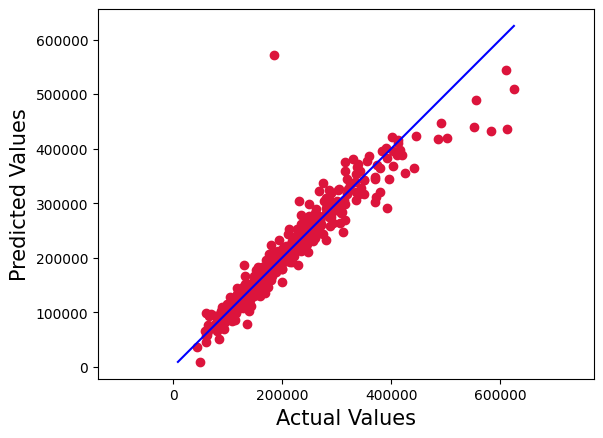

In [9]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(linear_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

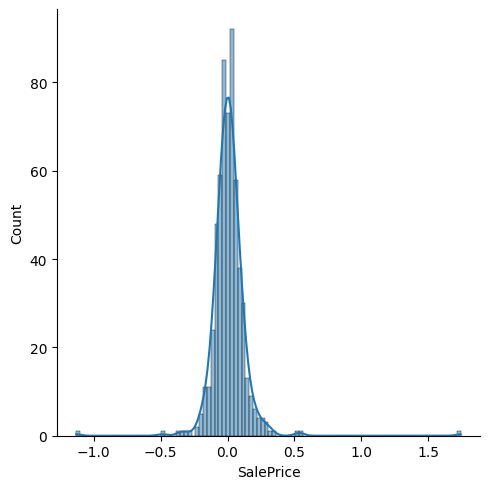

In [10]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - linear_pred), bins = 100, kde = True)

## Step 7: Hyperparameter tuning (grid search)

In [11]:
# Specifies hyperparameter options
parameters = {'fit_intercept': [True, False], 'positive': [True, False], 'copy_X': [True, False]}

In [12]:
# Apply grid search to find the best hyperparameter option
GS_CV_lin = GridSearchCV(estimator = linear, param_grid = parameters, cv = 5)
GS_CV_lin.fit(x_train, y_train)
GS_CV_lin.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [13]:
# Built a linear model with the new hyperparameter option
# {'copy_X': True, 'fit_intercept': True, 'positive': False}
linear_mod = LinearRegression(copy_X = True, fit_intercept = True, positive = False)
linear_mod.fit(x_train, y_train)
linear_pred = linear_mod.predict(x_test)

## Step 8: Check for scores

In [14]:
# Check for the score of the prediction
linear_mod_score = linear_mod.score(x_train, y_train)
print('Linear Regression Model Score: ', round(linear_mod_score, 3))

# R squared value
r2 = r2_score(y_test, linear_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, linear_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, linear_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(linear_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

Linear Regression Model Score:  0.934
R Squared:  0.907
Adjusted R Squared:  0.897
Mean Squared Error:  0.017
Root Mean Squared Error:  0.131
Mean Absolute Error:  0.076
Accuracy:  87.308 %


## Step 9: Create visuals

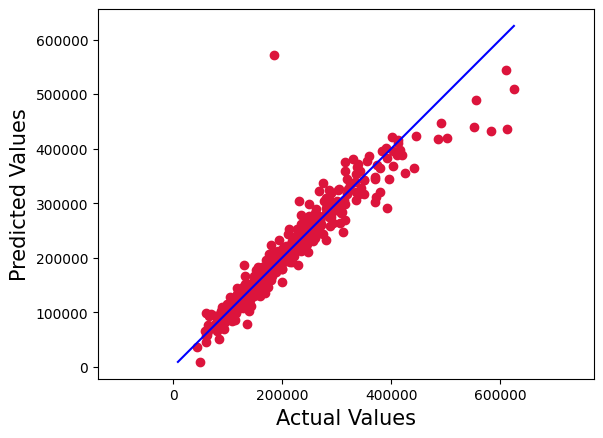

In [15]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(linear_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

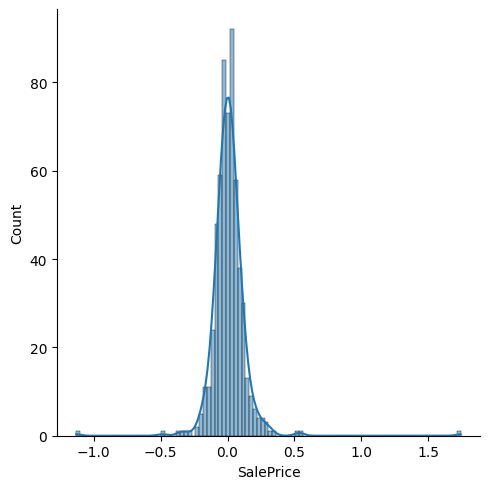

In [16]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - linear_pred), bins = 100, kde = True)